In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sb

# Data cleaning

In [2]:
cnn_df = pd.read_csv("CNN_Articles.csv")

## Data exploration

In [3]:
cnn_df.shape

(9308, 11)

In [4]:
cnn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9308 entries, 0 to 9307
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            9308 non-null   int64 
 1   author                9308 non-null   object
 2   date_published        9308 non-null   object
 3   part_of               9308 non-null   object
 4   article_section       9308 non-null   object
 5   url                   9308 non-null   object
 6   headline              9308 non-null   object
 7   description           9308 non-null   object
 8   keywords              9308 non-null   object
 9   alternative_headline  9308 non-null   object
 10  text                  9308 non-null   object
dtypes: int64(1), object(10)
memory usage: 800.0+ KB


In [5]:
cnn_df.head()

,Unnamed: 0,author,date_published,part_of,article_section,url,headline,description,keywords,alternative_headline,text
0,0,"Jacopo Prisco, CNN",2021-07-15T02:46:59Z,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
1,1,"Jacopo Prisco, CNN",2021-07-15T02:46:59Z,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
2,2,"Stephanie Bailey, CNN",2021-05-12T07:52:09Z,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...
3,3,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16T02:51:30Z,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
4,4,"Paul R. La Monica, CNN Business",2022-03-15T09:57:36Z,business,investing,https://www.cnn.com/2022/03/15/investing/brics...,Russia is no longer an option for investors. T...,"For many years, the world's most popular emerg...","investing, Russia is no longer an option for i...",Russia is no longer an option for investors. T...,"New York (CNN Business)For many years, the wor..."


In [6]:
cnn_df.isnull().any()

Unnamed: 0              False
author                  False
date_published          False
part_of                 False
article_section         False
url                     False
headline                False
description             False
keywords                False
alternative_headline    False
text                    False
dtype: bool

## Dealing with duplicates

In [7]:
cnn_df.duplicated().any()

False

In [8]:
cnn_df['url'].value_counts()

https://www.cnn.com/2022/03/15/investing/brics-emerging-markets-russia/index.html                                   14
https://www.cnn.com/2022/03/06/entertainment/winning-time-review/index.html                                         10
https://www.cnn.com/2022/03/07/entertainment/turning-red-review/index.html                                          10
https://www.cnn.com/2021/06/03/sport/janja-garnbret-climbing-olympics-tokyo-cmd-spt-intl/index.html                  9
https://www.cnn.com/2022/02/07/weather/category-6-hurricane-wxn/index.html                                           8
                                                                                                                    ..
https://www.cnn.com/2021/05/31/europe/decapitated-roman-remains-scn-scli-intl/index.html                             2
https://www.cnn.com/2021/05/30/tennis/naomi-osaka-french-open-first-round-win-spt-intl/index.html                    2
https://www.cnn.com/2021/05/31/football/alex-fer

In [9]:
cnn_df.drop_duplicates(subset = ["url"], keep = "first", inplace = True)
cnn_df["url"].value_counts()

https://www.cnn.com/2021/07/14/world/tusimple-autonomous-truck-spc-intl/index.html                               1
https://www.cnn.com/2021/07/17/motorsport/ana-carrasco-supersport-broken-back-return-cmd-spt-intl/index.html     1
https://www.cnn.com/2021/08/10/australia/australia-magpie-baby-death-intl-hnk/index.html                         1
https://www.cnn.com/2021/08/10/sport/india-olympics-glory-intl-hnk/index.html                                    1
https://www.cnn.com/2021/08/09/us/lamar-jackson-baltimore-ravens-covid/index.html                                1
                                                                                                                ..
https://www.cnn.com/2021/03/12/uk/meghan-race-britain-gbr-intl/index.html                                        1
https://www.cnn.com/2021/03/11/europe/nazi-guard-trial-harry-s-stutthof-scli-intl-grm/index.html                 1
https://www.cnn.com/2021/03/11/football/nba-meyers-leonard-fine-suspension-spt-i

## Missing data

In [10]:
round((cnn_df.isnull().sum())/(cnn_df.shape[0]), 2)

Unnamed: 0              0.0
author                  0.0
date_published          0.0
part_of                 0.0
article_section         0.0
url                     0.0
headline                0.0
description             0.0
keywords                0.0
alternative_headline    0.0
text                    0.0
dtype: float64

## Column type

In [11]:
cnn_df["author"] = cnn_df["author"].astype("string")
cnn_df["date_published"] = cnn_df["date_published"].astype("datetime64[ns]")
cnn_df["part_of"] = cnn_df["part_of"].astype("string")
cnn_df["article_section"] = cnn_df["article_section"].astype("string")
cnn_df["url"] = cnn_df["url"].astype("string")
cnn_df["headline"] = cnn_df["headline"].astype("string")
cnn_df["description"] = cnn_df["description"].astype("string")
cnn_df["keywords"] = cnn_df["keywords"].astype("string")
cnn_df["alternative_headline"] = cnn_df["alternative_headline"].astype("string")
cnn_df["text"] = cnn_df["text"].astype("string")

In [12]:
cnn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4076 entries, 0 to 4729
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            4076 non-null   int64         
 1   author                4076 non-null   string        
 2   date_published        4076 non-null   datetime64[ns]
 3   part_of               4076 non-null   string        
 4   article_section       4076 non-null   string        
 5   url                   4076 non-null   string        
 6   headline              4076 non-null   string        
 7   description           4076 non-null   string        
 8   keywords              4076 non-null   string        
 9   alternative_headline  4076 non-null   string        
 10  text                  4076 non-null   string        
dtypes: datetime64[ns](1), int64(1), string(9)
memory usage: 382.1 KB


## Rename columns 

In [13]:
cnn_df = cnn_df.rename(columns = {"Unnamed: 0":"Id",
                                  "author":"Author", "date_published":"Date published", "part_of":"Category",
                                  "article_section":"Section", "url":"Url", "headline":"Headline", "description":"Description",
                                  "keywords":"Keywords", "alternative_headline":"Alternative_headline", "text":"Text"})

In [14]:
cnn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4076 entries, 0 to 4729
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    4076 non-null   int64         
 1   Author                4076 non-null   string        
 2   Date published        4076 non-null   datetime64[ns]
 3   Category              4076 non-null   string        
 4   Section               4076 non-null   string        
 5   Url                   4076 non-null   string        
 6   Headline              4076 non-null   string        
 7   Description           4076 non-null   string        
 8   Keywords              4076 non-null   string        
 9   Alternative_headline  4076 non-null   string        
 10  Text                  4076 non-null   string        
dtypes: datetime64[ns](1), int64(1), string(9)
memory usage: 382.1 KB


# Data visualization

In [15]:
cnn_df.sample(5)

,Id,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Alternative_headline,Text
3778,3778,Story by Reuters,2021-10-27 08:48:01,sport,tennis,https://www.cnn.com/2021/10/27/tennis/australi...,Australian Open: No unvaccinated players at to...,Victoria Premier Daniel Andrews said his gover...,"tennis, Australian Open: No unvaccinated playe...","No unvaccinated players at Australian Open, sa...",Victoria Premier Daniel Andrews said his gover...
1147,1147,"Wayne Drash, CNN Photographs by Kayana Szymcza...",2018-08-15 08:28:19,health,health,https://www.cnn.com/2018/08/15/health/cancer-s...,"When insurance wouldn't pay, parents funded ca...","Kate Weissman's parents paid $95,000 for her c...","health, When insurance wouldn't pay, parents f...","When insurance wouldn't pay, parents funded ca...",Boston (CNN)Kate Weissman sits at the edge of ...
3969,3969,Reuters,2021-10-12 09:20:48,sport,tennis,https://www.cnn.com/2021/10/12/tennis/australi...,Australian Open: Get vaccinated if you want to...,Tennis players planning to compete in the Aust...,"tennis, Australian Open: Get vaccinated if you...",Want to play in the Australian Open? Get vacci...,(Reuters)Tennis players planning to compete i...
899,899,"John D. Sutter and Matthew Gannon, CNN",2015-11-23 14:37:20,news,opinions,https://www.cnn.com/2015/11/23/opinions/sutter...,Climate change: The community that stood up to...,Two Degrees: John D. Sutter visits the Norther...,"opinions, Climate change: The community that s...",The community that stood up to coal,CNN columnist John D. Sutter is reporting from...
1351,1351,"Blake Ellis and Melanie Hicken, CNN",2021-03-26 02:20:53,business,business,https://www.cnn.com/2021/03/25/business/covid-...,Fake tax preparer exposed by CNN charged with ...,An Arizona businessman who secured more than $...,"business, Fake tax preparer exposed by CNN cha...",Fake CPA hit with criminal charges for Covid-1...,(CNN)An Arizona businessman who secured more ...


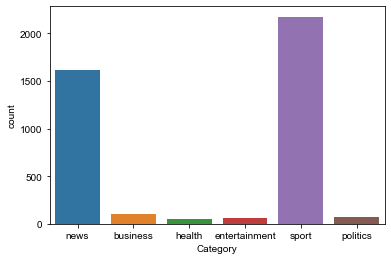

In [21]:
sb.countplot(x = cnn_df["Category"])
sb.set_style("darkgrid")


In [22]:
cnn_df["Category"].value_counts()

sport            2176
news             1611
business          104
politics           75
entertainment      58
health             52
Name: Category, dtype: Int64

In [29]:
def autolabel(rects, labels=None, height_factor=1.01):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        if labels is not None:
            try:
                label = labels[i]
            except (TypeError, KeyError):
                label = ' '
        else:
            label = '%d' % int(height)
        ax.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}'.format(label),
                ha='center', va='bottom')

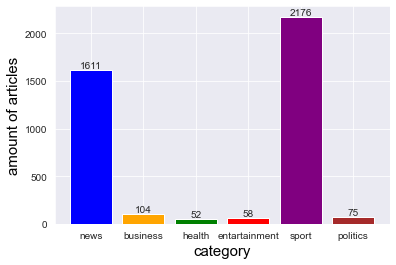

In [38]:
categories = ['news','business','health','entartainment', 'sport', 'politics']
values = [1611,104,52,58,2176,75]

bars = plt.bar(categories, values, color=['blue', 'orange','green','red','purple','brown'])
ax = plt.gca()
autolabel(ax.patches, height_factor=1)

ax.set_xlabel("category", fontsize=15, color='black')
ax.set_ylabel("amount of articles", fontsize=15, color='black')

sb.set_style("darkgrid")
plt.savefig("countplot.png", dpi = 1000)

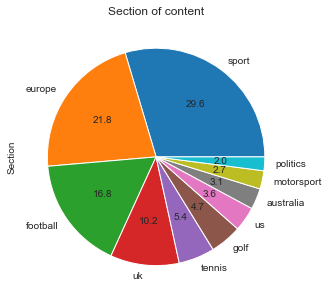

In [39]:
cnn_df['Section'].value_counts()[:10].plot(kind='pie',autopct='%.1f', figsize = (5, 5));
plt.title("Section of content")
plt.savefig("piechart.png", dpi = 1000)

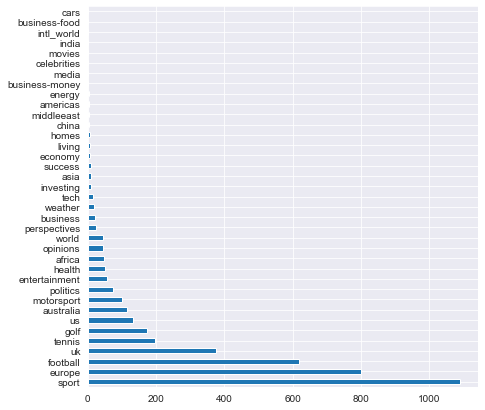

In [40]:
cnn_df["Section"].value_counts().plot(kind = "barh", figsize = (7, 7))
sb.set_style("darkgrid")
plt.savefig("chart.png", dpi = 1000)

In [41]:
cnn_df["Author"].unique()

<StringArray>
[                                                    'Jacopo Prisco, CNN',
                                                  'Stephanie Bailey, CNN',
                      'Words by Stephanie Bailey, video by Zahra Jamshed',
                                        'Paul R. La Monica, CNN Business',
                                                                'Reuters',
                                                    'Paul P. Murphy, CNN',
                                             'Oliver Darcy, CNN Business',
                                            'Charles Riley, CNN Business',
                                                'Matt Egan, CNN Business',
                                          'Parija Kavilanz, CNN Business',
 ...
                                     'Joseph Ataman and Dalal Mawad, CNN',
                                                        'John Lynch, CNN',
                                                        'Xiaofei Xu, CNN',
 'Amy 

In [42]:
cnn_authors_df = pd.DataFrame({"Author": cnn_df["Author"].unique(), "Amount": cnn_df["Author"].value_counts()})

In [43]:
cnn_authors_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1531 entries, Ben Morse, CNN to Analysis by Stephen Collinson, CNN
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Author  1531 non-null   string
 1   Amount  1531 non-null   Int64 
dtypes: Int64(1), string(1)
memory usage: 37.4+ KB


In [44]:
cnn_authors_df.sort_values(by = "Amount", ascending = False)

,Author,Amount
"Ben Morse, CNN","Jacopo Prisco, CNN",318
Story by Reuters,"Stephanie Bailey, CNN",207
"Ben Church, CNN","Words by Stephanie Bailey, video by Zahra Jamshed",192
"George Ramsay, CNN","Paul R. La Monica, CNN Business",163
"Matias Grez, CNN",Reuters,148
...,...,...
"Becky Thompson, for CNN","Kevin Dotson, Homero De la Fuente, and Jacob L...",1
"Antonia Mortensen, Schams Elwazer and Arnaud Siad, CNN","Lauren Said-Moorhouse, CNN",1
"Dave Close and John Sinnott, CNN","Sarah Dean, Fred Pleitgen, Nadine Schmidt and ...",1
"Ethan Cohen and Gregory Krieg, CNN","Hira Humayun, CNN",1


In [45]:
cnn_authors_df.head(10)

,Author,Amount
"Ben Morse, CNN","Jacopo Prisco, CNN",318
Story by Reuters,"Stephanie Bailey, CNN",207
"Ben Church, CNN","Words by Stephanie Bailey, video by Zahra Jamshed",192
"George Ramsay, CNN","Paul R. La Monica, CNN Business",163
"Matias Grez, CNN",Reuters,148
"Analysis by Luke McGee, CNN","Paul P. Murphy, CNN",55
"Jack Bantock, CNN","Oliver Darcy, CNN Business",54
"John Sinnott, CNN","Charles Riley, CNN Business",52
Reuters,"Matt Egan, CNN Business",52
"Amy Woodyatt, CNN","Parija Kavilanz, CNN Business",50


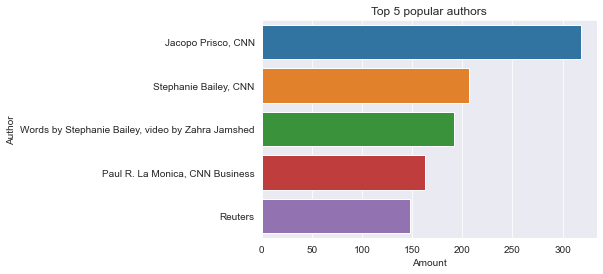

In [49]:
sb.barplot(data = cnn_authors_df[:5], x = "Amount", y = "Author")
sb.set_style("darkgrid")
plt.title("Top 5 popular authors")
plt.savefig("authors_barchart.png", dpi = 1000, bbox_inches = "tight")